In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.Gender = df.Gender.map({'Male' : 1, 'Female' : 0})
df.head()
     

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [5]:
df.dtypes

User ID            int64
Gender             int64
Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [6]:

df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [7]:
df.drop(['User ID'], axis = 1, inplace = True)

In [8]:
df.shape
     

(400, 4)

In [9]:
df = df.drop_duplicates()

In [10]:
q3 = df.Age.quantile(0.75)
q1 = df.Age.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(3.5, 71.5)

In [11]:
q3 = df.EstimatedSalary.quantile(0.75)
q1 = df.EstimatedSalary.quantile(0.25)
iqr = q3 - q1
upper = q3 + (1.5*iqr)
lower = q1 - (1.5*iqr)
lower, upper

(-24500.0, 155500.0)

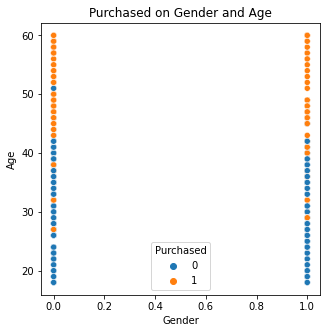

In [12]:
#EDA
plt.figure(figsize = (5,5))
sns.scatterplot(x = 'Gender', y = 'Age', hue = 'Purchased', data = df)
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Purchased on Gender and Age')
plt.show()
     

<Figure size 360x288 with 0 Axes>

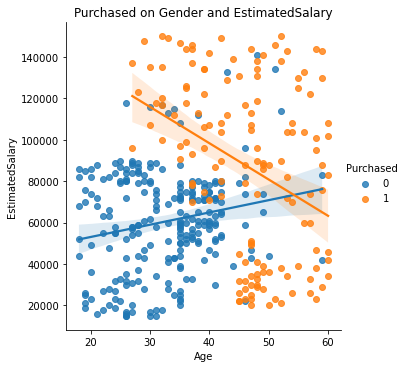

In [13]:
plt.figure(figsize = (5,4))
sns.lmplot(x = 'Age', y = 'EstimatedSalary', hue = 'Purchased', data = df)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Purchased on Gender and EstimatedSalary')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

X = df[['Gender', 'Age', 'EstimatedSalary']].values
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 5)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_predict = log.predict(X_test)

In [18]:
df_predict = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_predict})
df_predict

,Actual,Predicted
91,0,0
215,1,1
52,0,0
345,0,0
276,0,0
...,...,...
352,1,1
228,0,0
84,0,0
93,0,0


In [19]:
from sklearn.metrics import f1_score, accuracy_score, plot_roc_curve, confusion_matrix

In [20]:
log.score(X_test, y_test)

0.8771929824561403

In [21]:
f1_score(y_test, y_predict)

0.8333333333333333

In [22]:
confusion_matrix(y_test, y_predict)

array([[65,  6],
       [ 8, 35]], dtype=int64)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


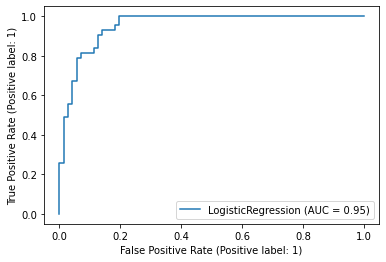

In [23]:
plot_roc_curve(log, X_test, y_test)

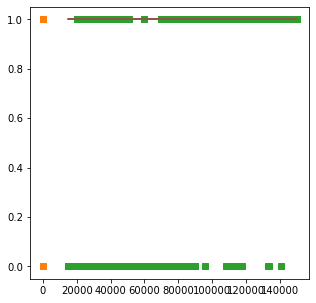

In [24]:
plt.figure(figsize=(5,5))
plt.plot(X,y,"s")
plt.plot(X,log.predict(X))